In [1]:
# Load and Import
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Concatenate

from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
#ensure that TensorFlow can access local GPUs

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)


In [3]:
#Loading Data

# Load data from the first CSV file
file_path1 = 'data/windowed_sequences/W_buffer/one_series_small_set_enmo_windowed_W400_B40.csv'


file_path2 = 'data/windowed_sequences/W_buffer/one_series_small_set_anglez_windowed_W400_B40.csv'

file1_data = pd.read_csv(file_path1)#, dtype=np.float32)

# Set the first column as the index
#file1_data.set_index(file1_data.columns[0], inplace=True)

# Convert the DataFrame to a NumPy array
drop_columns = ["series_id", "global first step num", "global first timestamp", "awake","wakeup","fallasleep","asleep"]
file1_array = file1_data.drop(columns=drop_columns).values

# Load data from the second CSV file
file2_data = pd.read_csv(file_path2)

file2_array = file2_data.drop(columns=drop_columns).values

data_identity_storage = file1_data[["series_id", "global first step num", "global first timestamp"]]
df_Y = file1_data.iloc[:, -4:]
Y_all = df_Y.values
# Check shapes
assert file1_array.shape == file2_array.shape, "Arrays should have the same shape"

# Create 3D array
three_d_array = np.stack([file1_array, file2_array], axis=2)


In [4]:
series_id = set(file1_data["series_id"])
print(series_id)

{'5f94bb3e1bed'}


In [5]:
# Extract indices from the original 3D array
indices_list = list(range(three_d_array.shape[0]))

In [6]:
loaded_model = load_model('model/model_one_series_LSTM128_W_attention_W400_B40.h5')

# Assuming you have a new dataset 'new_X' and predicted classes 'predicted_classes'
# Replace 'loaded_model' with the actual reference to your trained model



# Example data (replace with your actual data)
X_train = three_d_array  # This is the windowed dataset the model was trained on.
window_size = three_d_array.shape[1]
prediction = loaded_model.predict(X_train)
predicted_classes = np.argmax(prediction, axis=1)

12622/12622 [==============================] - 792s 63ms/step


In [7]:
# Example list of row indices (replace with your actual indices)
row_indices = list(range(len(X_train)))

# Assuming 'original_time_series_length' is the length of the original time series
original_time_series_length = len(X_train)+window_size-1  # Replace with the actual length

# Initialize a list of zeros with the length of the original time series
result_list = [0] * original_time_series_length

# Iterate through the dataset and modify the result_list based on predicted classes
for idx, predicted_class in zip(row_indices, predicted_classes):
    if predicted_class == 1:  # 1 represents the 'wakeup' class
        #result_list[idx:idx + window_size] += 1
        for i in range(window_size):
            result_list[idx + i] += 1
    elif predicted_class == 2:  # 2 represents the 'fallasleep' class
        #result_list[idx:idx + window_size] += -1
        for i in range(window_size):
            result_list[idx + i] -= 1

truth_list = [0] * original_time_series_length # a counterpart for result_list, considering the groundtruth labels

truth_classes = np.argmax(Y_all, axis=1)

# Iterate through the dataset and modify the truth_list based on predicted classes
for idx, truth_class in zip(row_indices, truth_classes):
    if truth_class == 1:  # 1 represents the 'wakeup' class
        #truth_list[idx:idx + window_size] += 1
        for i in range(window_size):
            truth_list[idx + i] += 1
    elif truth_class == 2:  # 2 represents the 'fallasleep' class
        #truth_list[idx:idx + window_size] -= 1
        for i in range(window_size):
            truth_list[idx + i] -= 1


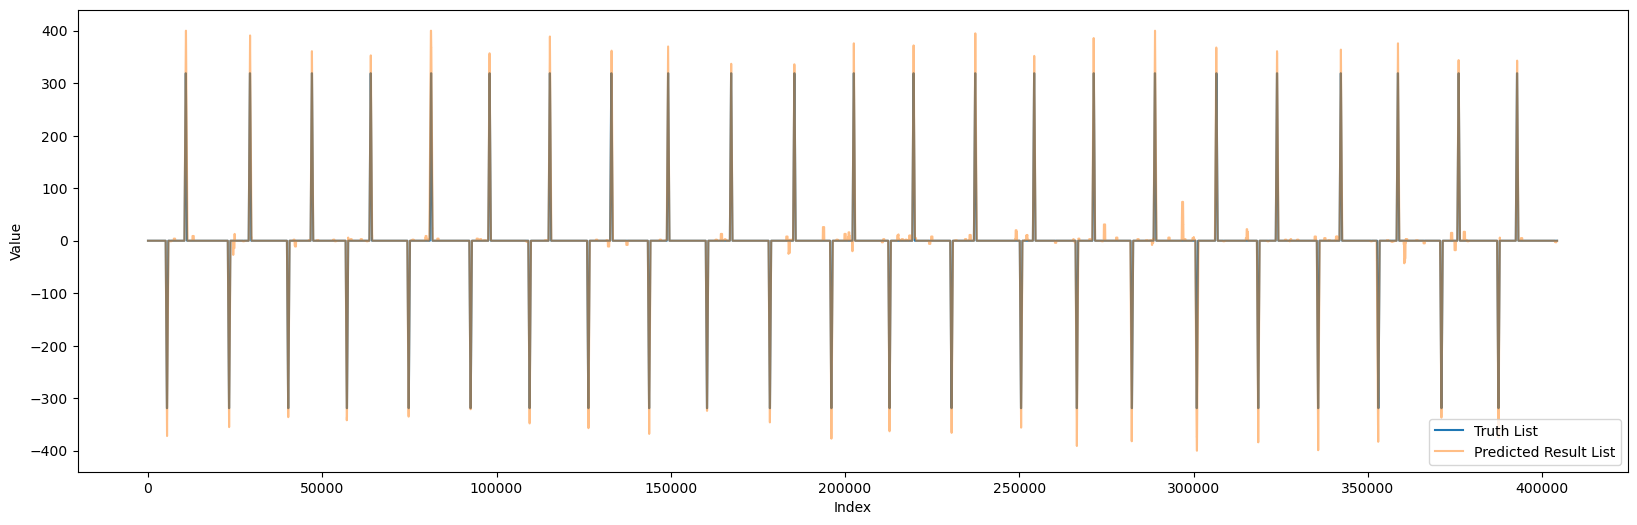

In [8]:

plt.figure(figsize=(20, 6))
# Plotting
plt.plot(range(original_time_series_length), truth_list, label='Truth List')
plt.plot(range(original_time_series_length), result_list, label='Predicted Result List', alpha=0.5)

# Adding labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()

In [9]:
#Loading Data

# Load data from the first CSV file
file_path1 = 'data/windowed_sequences/W_buffer/18b61dd5aae8_small_set_enmo_windowed_W400_B40.csv'


file_path2 = 'data/windowed_sequences/W_buffer/18b61dd5aae8_small_set_anglez_windowed_W400_B40.csv'

file1_data = pd.read_csv(file_path1)#, dtype=np.float32)

# Set the first column as the index
#file1_data.set_index(file1_data.columns[0], inplace=True)

# Convert the DataFrame to a NumPy array
drop_columns = ["series_id", "global first step num", "global first timestamp", "awake","wakeup","fallasleep","asleep"]
file1_array = file1_data.drop(columns=drop_columns).values

# Load data from the second CSV file
file2_data = pd.read_csv(file_path2)

file2_array = file2_data.drop(columns=drop_columns).values

data_identity_storage = file1_data[["series_id", "global first step num", "global first timestamp"]]
df_Y = file1_data.iloc[:, -4:]
Y_all = df_Y.values
# Check shapes
assert file1_array.shape == file2_array.shape, "Arrays should have the same shape"

# Create 3D array
three_d_array = np.stack([file1_array, file2_array], axis=2)


In [10]:
series_id = set(file1_data["series_id"])
print(series_id)

{'18b61dd5aae8'}


In [11]:
# Extract indices from the original 3D array
indices_list = list(range(three_d_array.shape[0]))

In [12]:
loaded_model = load_model('model/model_one_series_LSTM128_W_attention_W400_B40.h5')

# Assuming you have a new dataset 'new_X' and predicted classes 'predicted_classes'
# Replace 'loaded_model' with the actual reference to your trained model



# Example data (replace with your actual data)
X_train = three_d_array  # This is the windowed dataset the model was trained on.
window_size = three_d_array.shape[1]
prediction = loaded_model.predict(X_train)
predicted_classes = np.argmax(prediction, axis=1)

15474/15474 [==============================] - 1160s 75ms/step


In [13]:
# Example list of row indices (replace with your actual indices)
row_indices = list(range(len(X_train)))

# Assuming 'original_time_series_length' is the length of the original time series
original_time_series_length = len(X_train)+window_size-1  # Replace with the actual length

# Initialize a list of zeros with the length of the original time series
result_list = [0] * original_time_series_length

# Iterate through the dataset and modify the result_list based on predicted classes
for idx, predicted_class in zip(row_indices, predicted_classes):
    if predicted_class == 1:  # 1 represents the 'wakeup' class
        #result_list[idx:idx + window_size] += 1
        for i in range(window_size):
            result_list[idx + i] += 1
    elif predicted_class == 2:  # 2 represents the 'fallasleep' class
        #result_list[idx:idx + window_size] += -1
        for i in range(window_size):
            result_list[idx + i] -= 1

truth_list = [0] * original_time_series_length # a counterpart for result_list, considering the groundtruth labels

truth_classes = np.argmax(Y_all, axis=1)

# Iterate through the dataset and modify the truth_list based on predicted classes
for idx, truth_class in zip(row_indices, truth_classes):
    if truth_class == 1:  # 1 represents the 'wakeup' class
        #truth_list[idx:idx + window_size] += 1
        for i in range(window_size):
            truth_list[idx + i] += 1
    elif truth_class == 2:  # 2 represents the 'fallasleep' class
        #truth_list[idx:idx + window_size] -= 1
        for i in range(window_size):
            truth_list[idx + i] -= 1


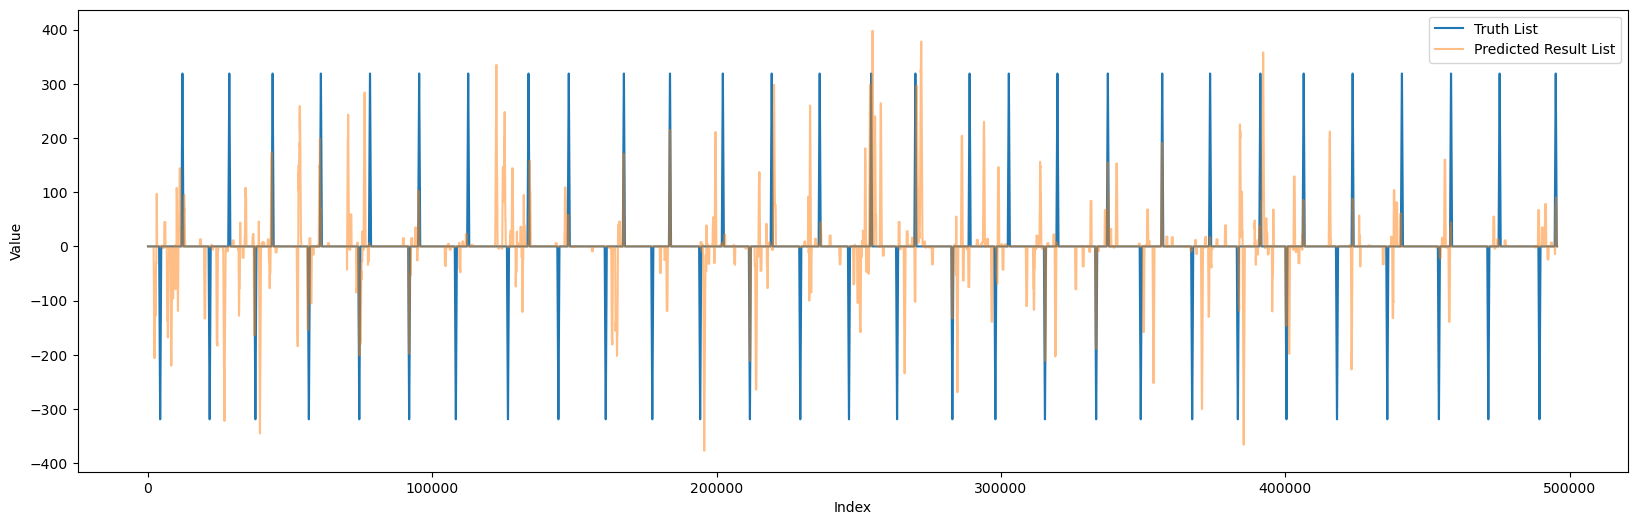

In [14]:

plt.figure(figsize=(20, 6))
# Plotting
plt.plot(range(original_time_series_length), truth_list, label='Truth List')
plt.plot(range(original_time_series_length), result_list, label='Predicted Result List', alpha=0.5)

# Adding labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()